# Install and importing Required Libraries

In [2]:
# Importing necessary libraries

# pandas: For data manipulation and analysis
import pandas as pd

# numpy: For numerical computations and array operations
import numpy as np

# matplotlib.pyplot: For creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# seaborn: For statistical data visualization (built on top of matplotlib)
import seaborn as sns

# sklearn.model_selection.train_test_split: For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# sklearn.preprocessing.StandardScaler: For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# sklearn.metrics.classification_report, confusion_matrix: For evaluating classification models
from sklearn.metrics import classification_report, confusion_matrix

# tensorflow: For building and training deep learning models
import tensorflow as tf

# tensorflow.keras.models.Sequential: For creating a linear stack of layers in a neural network
from tensorflow.keras.models import Sequential

# tensorflow.keras.layers.Dense, Dropout: For adding fully connected layers and dropout layers to the neural network
from tensorflow.keras.layers import Dense, Dropout

# tensorflow.keras.callbacks.EarlyStopping: For stopping training early if the validation loss stops improving
from tensorflow.keras.callbacks import EarlyStopping

# sklearn.datasets.make_classification: For generating synthetic datasets for classification tasks
from sklearn.datasets import make_classification

# sklearn.metrics.accuracy_score, f1_score, precision_score, recall_score: For calculating various evaluation metrics for classification models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Load and Preprocess the Data

In [3]:
# Load the dataset from a CSV file named 'Brain_Tumor.csv'
df = pd.read_csv('Brain_Tumor.csv')

# Display basic information about the dataset, such as column names, data types, and non-null counts
print(df.info())

# Display the count of each class in the 'Class' column to understand the class distribution
print(df['Class'].value_counts())

# Drop the 'Image' column as it is not a feature relevant for model training
df = df.drop('Image', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

# Feature and Target Variable Separation

In [4]:
# Display the shape of the dataset (number of rows and columns)
print(f"Dataset shape: {df.shape}")

# Check for missing values in each column and display the count
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (3762, 14)

Missing values per column:
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


In [ ]:
# from collections import Counter

# # Visualize class distribution before balancing
# plt.figure(figsize=(6, 4))
# plt.bar(Counter(df["Class"]).keys(), Counter(df["Class"]).values())
# plt.title("Class Distribution Before Balancing")
# plt.xlabel("Tumor Class")
# plt.ylabel("Count")
# plt.show()

In [6]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Tokenize the text
# tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
# tokenizer.fit_on_texts(df["Class"].astype(str))
# vocab_size = len(tokenizer.word_index) + 1
# max_length = 100
# X = tokenizer.texts_to_sequences(df["Class"].astype(str))
# X = pad_sequences(X, maxlen=max_length, padding='post')
# y = df["Class"].values

In [7]:
# # Import RandomOverSampler from imblearn
# from imblearn.over_sampling import RandomOverSampler

# # Balance the dataset using oversampling
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

In [8]:
# # Visualize class distribution after balancing
# plt.figure(figsize=(6, 4))
# plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
# plt.title("Class Distribution After Balancing")
# plt.xlabel("Tumor Class")
# plt.ylabel("Count")
# plt.show()

# Split Dataset into Training and Testing Sets

In [9]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform it to scale the features
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


# Model Evaluation and Predictions

In [10]:
# Initialize a Sequential model
model = Sequential()

# Add the first Dense layer with 64 neurons, ReLU activation, and input dimension matching the number of features
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add a Dropout layer with a rate of 0.5 to reduce overfitting
model.add(Dropout(0.5))

# Add the second Dense layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Add another Dropout layer with a rate of 0.5 to further reduce overfitting
model.add(Dropout(0.5))

# Add the output Dense layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


c:\Users\AA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Training and Evaluation

In [11]:
# Compile the model with the specified optimizer, loss function, and evaluation metrics
# optimizer='adam': Adaptive Moment Estimation optimizer, commonly used for deep learning
# loss='binary_crossentropy': Loss function for binary classification tasks
# metrics=['accuracy']: Metric to evaluate the model's performance during training and testing
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model Training History and Evaluation

In [47]:
# Initialize the EarlyStopping callback
# monitor='val_loss': Monitors the validation loss during training
# patience=5: Stops training if the validation loss does not improve for 5 consecutive epochs
# restore_best_weights=True: Restores the model weights from the epoch with the best validation loss
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model using the training data
# X_train_scaled: Scaled training features
# y_train: Target labels for training
# epochs=10: Maximum number of epochs to train the model
# validation_split=0.2: Use 20% of the training data for validation
# batch_size=32: Number of samples per gradient update
# callbacks=[early_stop]: Use the EarlyStopping callback to stop training early if needed
# verbose=1: Display training progress
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9789 - loss: 0.0719 - val_accuracy: 0.9817 - val_loss: 0.0550
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9828 - loss: 0.0666 - val_accuracy: 0.9817 - val_loss: 0.0537
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9689 - loss: 0.0884 - val_accuracy: 0.9834 - val_loss: 0.0522
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9822 - loss: 0.0677 - val_accuracy: 0.9834 - val_loss: 0.0500
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9795 - loss: 0.0701 - val_accuracy: 0.9834 - val_loss: 0.0480
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9754 - loss: 0.0838 - val_accuracy: 0.9834 - val_loss: 0.0467
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9829 - loss: 0.0569 - val_accuracy: 0.9834 - val_loss: 0.0454
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0685 - val_accuracy: 0.9834 - val_loss:

# Model Training and Performance Evaluation

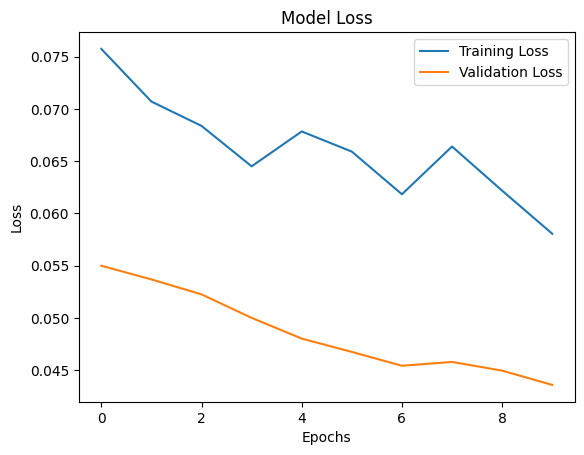

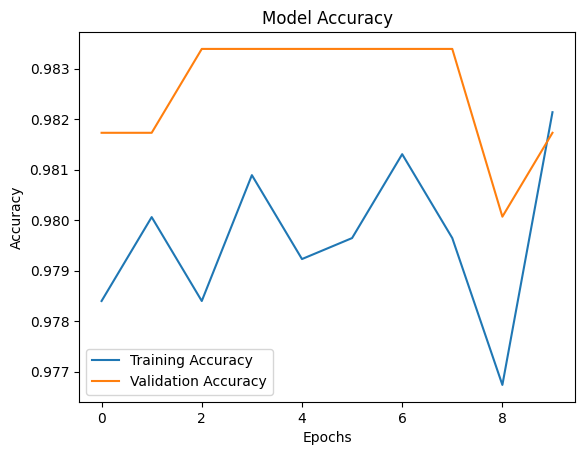

In [73]:
# Plot training history for loss
# Plot the training loss and validation loss over epochs to visualize the model's performance
plt.plot(history.history['loss'], label='Training Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss
plt.legend()  # Add a legend to distinguish between training and validation loss
plt.title('Model Loss')  # Title of the plot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.show()  # Display the plot

# Plot training history for accuracy
# Plot the training accuracy and validation accuracy over epochs to visualize the model's performance
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy
plt.legend()  # Add a legend to distinguish between training and validation accuracy
plt.title('Model Accuracy')  # Title of the plot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.show()  # Display the plot

# ######

# # Evaluate on test data
# # Evaluate the model's performance on the test dataset
# loss, accuracy = model.evaluate(X_test_scaled, y_test)  # Compute test loss and accuracy
# print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')  # Print the test loss and accuracy

# # Generate predictions
# # Predict the class labels for the test dataset
# y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Convert probabilities to binary class predictions

# # Classification report and confusion matrix
# # Generate a classification report to evaluate precision, recall, and F1-score
# print(classification_report(y_test, y_pred))  # Print the classification report

#####


# # Plot the confusion matrix to visualize the performance of the model
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d') # Annotate the confusion matrix
# plt.title('Confusion Matrix')  # Title of the plot
# plt.xticks(ticks=[0, 1], labels=['No Tumor', 'Tumor'])  # Set x-ticks to class labels
# plt.xlabel('Predicted')  # Label for the x-axis
# plt.ylabel('Actual')  # Label for the y-axis
# plt.show()  # Display the confusion matrix plot

In [49]:
# Evaluate on test data
# Evaluate the model's performance on the test dataset
loss, accuracy = model.evaluate(X_test_scaled, y_test)  # Compute test loss and accuracy
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')  # Print the test loss and accuracy

# Generate predictions
# Predict the class labels for the test dataset
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Convert probabilities to binary class predictions

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9936 - loss: 0.0195
Test Loss: 0.0272, Test Accuracy: 0.9894
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       416
           1       0.99      0.99      0.99       337

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753



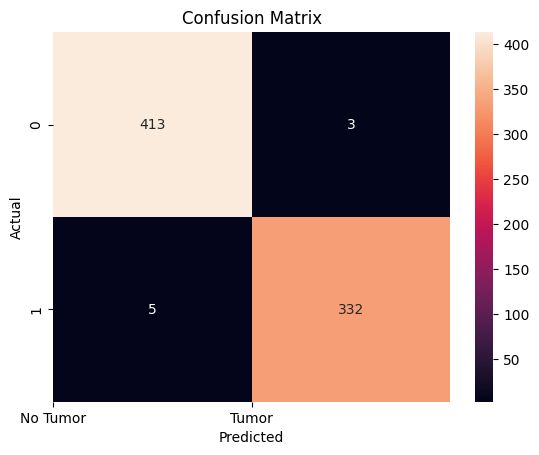

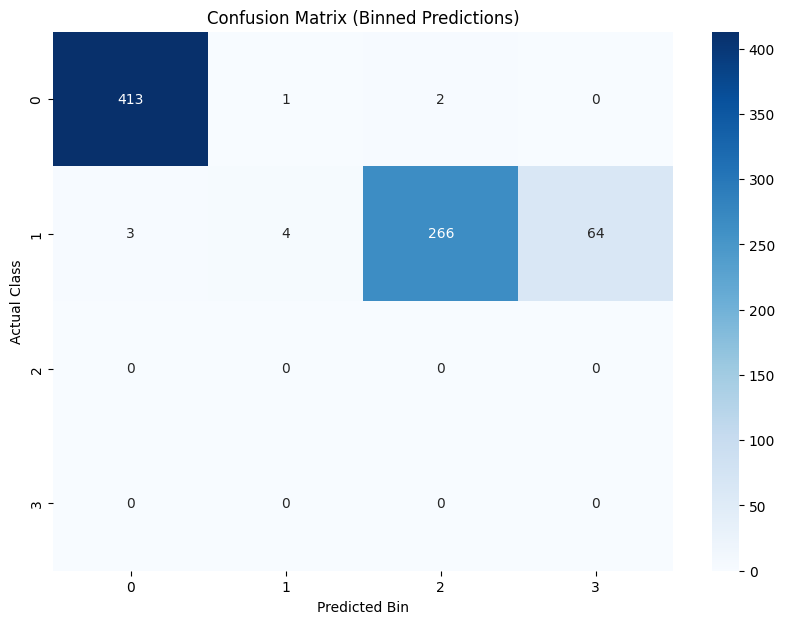

In [84]:
# Classification report and confusion matrix
# Generate a classification report to evaluate precision, recall, and F1-score
print("Classification report")
print(classification_report(y_test, y_pred))  # Print the classification report


# Purpose of confusion matrix:
# The confusion matrix provides a summary of prediction results on a classification problem.
# It shows the number of correct and incorrect predictions made by the model compared to the actual outcomes (target values).
# Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.
# This helps to visualize the performance of a classification model, including types of errors (false positives, false negatives).

# Plot the confusion matrix to visualize the performance of the model
sns.heatmap(confusion_matrix(y_test, predicted_classes), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bin the predicted probabilities into 4 categories
num_bins = 3
bins = np.linspace(0, 1, num_bins + 1)
predicted_bins = np.digitize(predictions.flatten(), bins) - 1  # bins are 0-indexed

# Bin the true labels similarly (if you want to compare with binned probabilities)
true_bins = y_test.values  # Still binary, or you can bin if you have probabilities

# Compute confusion matrix
cm = confusion_matrix(true_bins, predicted_bins)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Binned Predictions)')
plt.xlabel('Predicted Bin')
plt.ylabel('Actual Class')
plt.show()

# Model Predictions and Analysis

In [51]:
# Make predictions on the test dataset
predictions = model.predict(X_test_scaled)

# Convert probabilities to binary class predictions (0 or 1) for binary classification
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Display the features, predicted labels, and actual labels for the first 10 test samples
for i in range(10):
    print(f'Predicted Label: {predicted_classes[i]}')  # Display the predicted class label
    print(f'Actual Label: {y_test.iloc[i]}')  # Display the actual class label
    print('---')  # Separator for better readability

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted Label: 0
Actual Label: 0
---
Predicted Label: 0
Actual Label: 0
---
Predicted Label: 0
Actual Label: 0
---
Predicted Label: 0
Actual Label: 0
---
Predicted Label: 0
Actual Label: 0
---
Predicted Label: 0
Actual Label: 0
---
Predicted Label: 1
Actual Label: 1
---
Predicted Label: 0
Actual Label: 0
---
Predicted Label: 1
Actual Label: 1
---
Predicted Label: 0
Actual Label: 0
---


# Data Augmentation and Filtering

In [15]:
# Create a new DataFrame with data for 5 new persons
# new_data = pd.DataFrame({
#     'Image': ['Image3763', 'Image3764', 'Image3765', 'Image3766', 'Image3767'],  # Image identifiers
#     'Class': [1, 0, 1, 0, 1],  # Class labels: 1 for 'Has Tumor', 0 for 'No Tumor'
#     'Mean': [7.5, 6.8, 8.2, 5.9, 7.1],  # Mean intensity values
#     'Variance': [900, 850, 920, 870, 910],  # Variance of intensity values
#     'Standard Deviation': [30, 29.2, 30.3, 29.5, 30.1],  # Standard deviation of intensity values
#     'Entropy': [0.12, 0.10, 0.15, 0.11, 0.13],  # Entropy values
#     'Skewness': [4.1, 3.9, 4.3, 3.8, 4.2],  # Skewness of intensity distribution
#     'Kurtosis': [18.5, 17.8, 19.2, 17.5, 18.9],  # Kurtosis of intensity distribution
#     'Contrast': [100, 95, 105, 90, 102],  # Contrast values
#     'Energy': [0.3, 0.28, 0.32, 0.27, 0.31],  # Energy values
#     'ASM': [0.09, 0.08, 0.1, 0.07, 0.09],  # Angular second moment (ASM) values
#     'Homogeneity': [0.52, 0.51, 0.53, 0.50, 0.52],  # Homogeneity values
#     'Dissimilarity': [4.5, 4.4, 4.6, 4.3, 4.5],  # Dissimilarity values
#     'Correlation': [0.98, 0.97, 0.99, 0.96, 0.98],  # Correlation values
#     'Coarseness': [7.46, 7.45, 7.47, 7.44, 7.46]  # Coarseness values
# })

# Make sure cell 3 (where df is defined) is executed before running this cell

# Select 10 random rows from the existing dataset to use as new data
new_data = df.sample(10, random_state=42).copy()

# Append the new data to the existing dataset
df = pd.concat([df, new_data], ignore_index=True)

# Display the last 10 rows of the updated dataset
print(df.tail(10))

# Filter and display data of 10 persons who have a tumor (Class = 1)
has_tumor = df[df['Class'] == 1].head(10)
print("\nData of 10 persons who have a tumor:")
print(has_tumor)

# Filter and display data of 10 persons who do not have a tumor (Class = 0)
no_tumor = df[df['Class'] == 0].head(10)
print("\nData of 10 persons who do not have a tumor:")
print(no_tumor)

      Class       Mean     Variance  Standard Deviation   Entropy  Skewness  \
3762      1  13.666214  1298.441768           36.033897  0.046960  3.243674   
3763      0   2.172577    45.131070            6.717966  0.231946  3.536554   
3764      0  15.441986   724.512664           26.916773  0.062239  2.158160   
3765      1   2.970291   297.667929           17.253056  0.002242  6.396062   
3766      0   9.246765   341.897657           18.490475  0.131591  2.407934   
3767      0   5.795105    89.404902            9.455417  0.080488  2.070603   
3768      0   8.479355   435.107838           20.859239  0.136513  2.857802   
3769      0   5.960403   350.221919           18.714217  0.261207  3.510135   
3770      1   3.709503   402.381085           20.059439  0.002440  5.916625   
3771      1  25.308685  1808.940290           42.531639  0.007619  2.258635   

       Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
3762  11.307747  194.259896  0.188121  0.035390    